In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [53]:
session.query(Measurement.station, Measurement.prcp).all()

[('USC00519397', 2.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', None),
 ('USC00519397', 1.5),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.3),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.3),
 ('USC00519397', 0.0),
 ('USC00519397', 1.0),
 ('USC00519397', 3.0),
 ('USC00519397', 0.0),
 ('USC00519397', None),
 ('USC00519397', 0.8),
 ('USC00519397', 0.3),
 ('USC00519397', None),
 ('USC00519397', 0.3),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.5),
 ('USC00519397', 0.3),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7ca10eac20>,
 'prcp': 2.0,
 'id': 0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 18.3}

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

meas_date_desc_first = session.query(Measurement).order_by(Measurement.date.desc()).first()
meas_date_desc_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7ca04e34f0>,
 'prcp': 0.0,
 'id': 2723,
 'station': 'USC00519397',
 'date': '2017-08-23',
 'tobs': 27.2}

In [11]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

date_obj = meas_date_desc_first.date
#date_obj
date_iso = dt.date.fromisoformat(date_obj)
print(date_iso)

#date_strp = dt.datetime.strptime(date_obj, '%Y-%m-%d').date()
#date_strp

#date_out = dt.strptime(date_obj, '%Y-%m-%d')
#date_out = dt.date.fromisoformat(date_obj)
#date_out2 = dt.date.strptime(date_obj, '%Y-%m-%d')

subYearNumber = 1;

prcp_date_1yr_prior = date_iso - relativedelta(years=subYearNumber)
#prcp_date_1yr_prior
prcp_last12months_date = prcp_date_1yr_prior.isoformat()
prcp_last12months_date

2017-08-23


'2016-08-23'

In [12]:
prcp_date_last12months_all = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > prcp_last12months_date).all()
prcp_date_last12months_all

[('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('201

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(prcp_date_last12months_all)
df


,date,prcp
0,2016-08-24,2.0
1,2016-08-25,2.0
2,2016-08-26,0.0
3,2016-08-27,0.0
4,2016-08-28,0.3
...,...,...
2218,2017-08-19,2.3
2219,2017-08-20,NaN
2220,2017-08-21,14.2
2221,2017-08-22,12.7


In [14]:
renamed_df = df.rename(columns={"date":"Meas_Date", "prcp":"Rainfall"})
renamed_df
renamed_count = renamed_df.count()
print(renamed_count)

# clean data by removing NaN data. check column sizes
cleaned_df = renamed_df.dropna(how='any')
cleaned_df
cleaned_count = cleaned_df.count()
print(cleaned_count)
# Sort the dataframe by date
df_sorted_by_date = cleaned_df.sort_values(by='Meas_Date', ascending=False)
df_sorted_by_date



Meas_Date    2223
Rainfall     2015
dtype: int64
Meas_Date    2015
Rainfall     2015
dtype: int64


,Meas_Date,Rainfall
2222,2017-08-23,11.4
1523,2017-08-23,2.0
1005,2017-08-23,0.0
359,2017-08-23,0.0
358,2017-08-22,0.0
...,...,...
1524,2016-08-24,54.6
360,2016-08-24,54.6
1188,2016-08-24,31.0
702,2016-08-24,57.9


<Axes: title={'center': 'Precipitation'}>

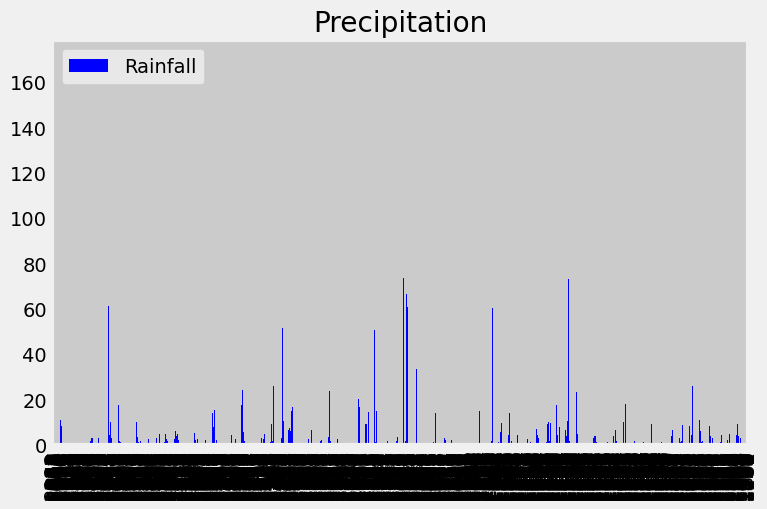

In [15]:
df_sorted_by_date.plot(kind="bar", facecolor="blue", figsize=(8,5),\
                                 title="Precipitation")


<Axes: title={'center': 'Precipitation'}, xlabel='Meas_Date'>

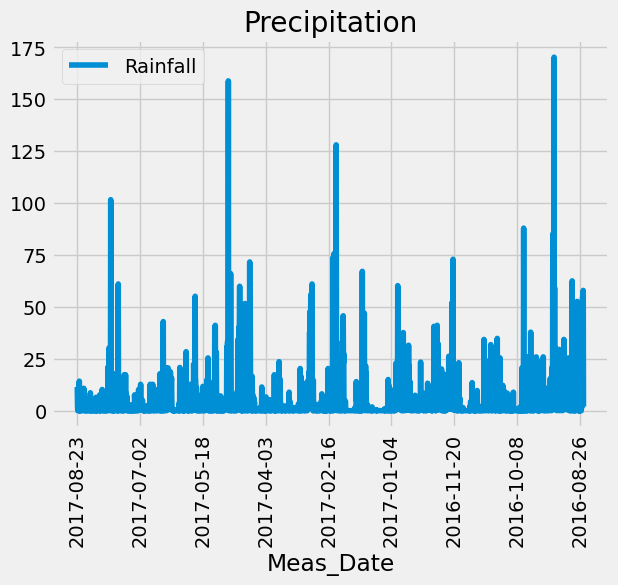

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

df_sorted_by_date.plot(x="Meas_Date", y="Rainfall", x_compat=True, title="Precipitation", rot=90)

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
    
df_sorted_by_date.describe()

,Rainfall
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station).distinct().count()
num_stations

9

In [41]:
station_data = session.query(Station).first()
station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7cb4e0c8b0>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 0,
 'elevation': 0.914}

In [44]:
station_list = session.query(Station.station).distinct().all()
station_list

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [60]:
# My test
# test to see if I can sum rainfall for each station - uses the initial Measurement table

session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).all()

[('USC00511918', 2362.099999999996),
 ('USC00513117', 9728.700000000037),
 ('USC00514830', 5962.8000000000475),
 ('USC00516128', 27136.69999999987),
 ('USC00517948', 1104.0999999999985),
 ('USC00518838', 1801.6999999999964),
 ('USC00519281', 14962.19999999989),
 ('USC00519397', 3354.4000000000215),
 ('USC00519523', 7518.500000000056)]

In [106]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and their counts in descending order.


# https://stackoverflow.com/questions/35132463/sqlalchemy-core-order-by-desc
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
# https://campus.datacamp.com/courses/introduction-to-relational-databases-in-python/applying-filtering-ordering-and-grouping-to-queries?ex=11
# https://stackoverflow.com/questions/31452174/sqlalchemy-group-by-and-sum

# This uses the 'Measurement' table

from sqlalchemy import desc

count_stations = session.query(Measurement.station, func.count(Measurement.station).label("station_count")).\
    group_by(Measurement.station).\
    order_by(desc("station_count")).\
    all()
count_stations





[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [107]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and their counts in descending order.


# https://stackoverflow.com/questions/35132463/sqlalchemy-core-order-by-desc
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
# https://campus.datacamp.com/courses/introduction-to-relational-databases-in-python/applying-filtering-ordering-and-grouping-to-queries?ex=11
# https://stackoverflow.com/questions/31452174/sqlalchemy-group-by-and-sum

# This uses the 'df_sorted_by_date' table

from sqlalchemy import desc

count_stations = session.query(df_sorted_by_date.station, func.count(df_sorted_by_date.station).label("station_count")).\
    group_by(df_sorted_by_date.station).\
    order_by(desc("station_count")).\
    all()
count_stations


AttributeError: 'DataFrame' object has no attribute 'station'

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()